In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# The SQL query used to:
- Extract the temperature data of the globe, Ho Chi Minh City (HCMC), Hanoi City - both of them are in Vietnam. 
- Calculate the moving average 3 years & 10 years. 

In [ ]:
# Pull the HCMC temp, globe temp and not included the null value from HCMC
WITH HCMC_temp AS (Select
city_data.year,
city_data.city,
city_data.country,
city_data.avg_temp as city_temp,
global_data.avg_temp as globlal_temp
From city_data 
join global_data on 
city_data.year = global_data.year
Where city = 'Ho Chi Minh City' AND city_data.avg_temp IS NOT NULL
Order by city_data.year),

# Pull the Hanoi city temp, globe temp and not included the null value from Hanoi city

Hanoi_temp AS (Select
city_data.year,
city_data.city,
city_data.country,
city_data.avg_temp as city_temp,
global_data.avg_temp as globlal_temp
From city_data 
join global_data on 
city_data.year = global_data.year
Where city = 'Hanoi' AND city_data.avg_temp IS NOT NULL
Order by city_data.year),

# Joined above 2 tables into one to unite HCMC, Hanoi and globe temp

CTE_1 AS (Select
HCMC_temp.year as year,
HCMC_temp.city_temp as HCMC_temp,
Hanoi_temp.city_temp as Hanoi_temp,
HCMC_temp.globlal_temp as globe_temp
From HCMC_temp
join Hanoi_temp
on HCMC_temp.year = Hanoi_temp.year)

# Calculate moving average 3 years and 10 years. 
        
select *,
  CASE WHEN row_number() OVER (order by year) >= 3
    THEN ROUND(AVG(hcmc_temp) OVER(ORDER BY year
     ROWS BETWEEN 2 PRECEDING AND CURRENT ROW),2) ELSE NULL END AS HCMC_MA3,

  CASE WHEN row_number() OVER (order by year) >= 10
    THEN ROUND(AVG(hcmc_temp) OVER(ORDER BY year
     ROWS BETWEEN 9 PRECEDING AND CURRENT ROW),2) ELSE NULL END AS HCMC_MA10,

     CASE WHEN row_number() OVER (order by year) >= 3
    THEN ROUND(AVG(hanoi_temp) OVER(ORDER BY year
     ROWS BETWEEN 2 PRECEDING AND CURRENT ROW),2) ELSE NULL END AS Hanoi_MA3,

     CASE WHEN row_number() OVER (order by year) >= 10
    THEN ROUND(AVG(hanoi_temp) OVER(ORDER BY year
     ROWS BETWEEN 9 PRECEDING AND CURRENT ROW),2) ELSE NULL END AS Hanoi_MA10,

     CASE WHEN row_number() OVER (order by year) >= 3
    THEN ROUND(AVG(globe_temp) OVER(ORDER BY year
     ROWS BETWEEN 2 PRECEDING AND CURRENT ROW),2) ELSE NULL END AS globe_MA3,

      CASE WHEN row_number() OVER (order by year) >= 10
    THEN ROUND(AVG(globe_temp) OVER(ORDER BY year
     ROWS BETWEEN 9 PRECEDING AND CURRENT ROW),2) ELSE NULL END AS globe_MA10
FROM CTE_1

## Import data and EDA

In [6]:
# Import the extracted data set after the SQL query. 
df = pd.read_csv("C:/Users/pntkh/Downloads/DA_Project_1_SQL_MA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        172 non-null    int64  
 1   hcmc_temp   172 non-null    float64
 2   hanoi_temp  172 non-null    float64
 3   globe_temp  172 non-null    float64
 4   hcmc_ma3    170 non-null    float64
 5   hcmc_ma10   163 non-null    float64
 6   hanoi_ma3   170 non-null    float64
 7   hanoi_ma10  163 non-null    float64
 8   globe_ma3   170 non-null    float64
 9   globe_ma10  163 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 13.6 KB


In [41]:
# Have a look of the dataframe. The *_ma3 & *_ma10 curves got null value is as expected.
df

,year,hcmc_temp,hanoi_temp,globe_temp,hcmc_ma3,hcmc_ma10,hanoi_ma3,hanoi_ma10,globe_ma3,globe_ma10
0,1840,26.63,21.00,7.80,NaN,NaN,NaN,NaN,NaN,NaN
1,1841,27.02,21.30,7.69,NaN,NaN,NaN,NaN,NaN,NaN
2,1842,26.87,21.16,8.02,26.84,NaN,21.15,NaN,7.84,NaN
3,1843,26.94,21.26,8.17,26.94,NaN,21.24,NaN,7.96,NaN
4,1844,26.41,20.78,7.65,26.74,NaN,21.07,NaN,7.95,NaN
...,...,...,...,...,...,...,...,...,...,...
167,2009,27.85,22.59,9.51,27.78,27.83,22.07,22.06,9.56,9.49
168,2010,28.28,22.57,9.70,27.91,27.89,22.18,22.14,9.55,9.54
169,2011,27.68,21.03,9.52,27.94,27.88,22.06,22.06,9.58,9.55
170,2012,28.25,22.09,9.51,28.07,27.90,21.90,22.06,9.58,9.55


## Descriptive Statistics

In [64]:
# Descriptive Statistic of the dateset
df[['hcmc_temp', 'hanoi_temp', 'globe_temp']].describe()

,hcmc_temp,hanoi_temp,globe_temp
count,172.000000,172.000000,172.000000
mean,27.187965,21.565291,8.531047
std,0.498458,0.482447,0.468811
min,24.850000,20.480000,7.560000
25%,26.855000,21.235000,8.180000
50%,27.230000,21.520000,8.520000
75%,27.540000,21.900000,8.760000
max,28.460000,23.100000,9.730000


- The standard deviation temperature of HCMC is higher than Hanoi city on this dataset. 
- The range temperature of HCMC is from 24.85 degC to 28.46 degC. The difference is 3.61 degC. 
- The range temperature of Hanoi city is from 20.48 degC to 23.10 degC. The difference is 2.62 degC. 
From 3 descriptive statistics, we can infer that the temperature in HCMC is less stable than Hanoi city. As a local people here in Vietnam, everybody can confirm how unpredictably the weather in HCMC (South Region of Vietnam) compared to Hanoi city (North Region of Vietnam).

The global temperature is far cooler than Vietnam. 

## Time Series weather

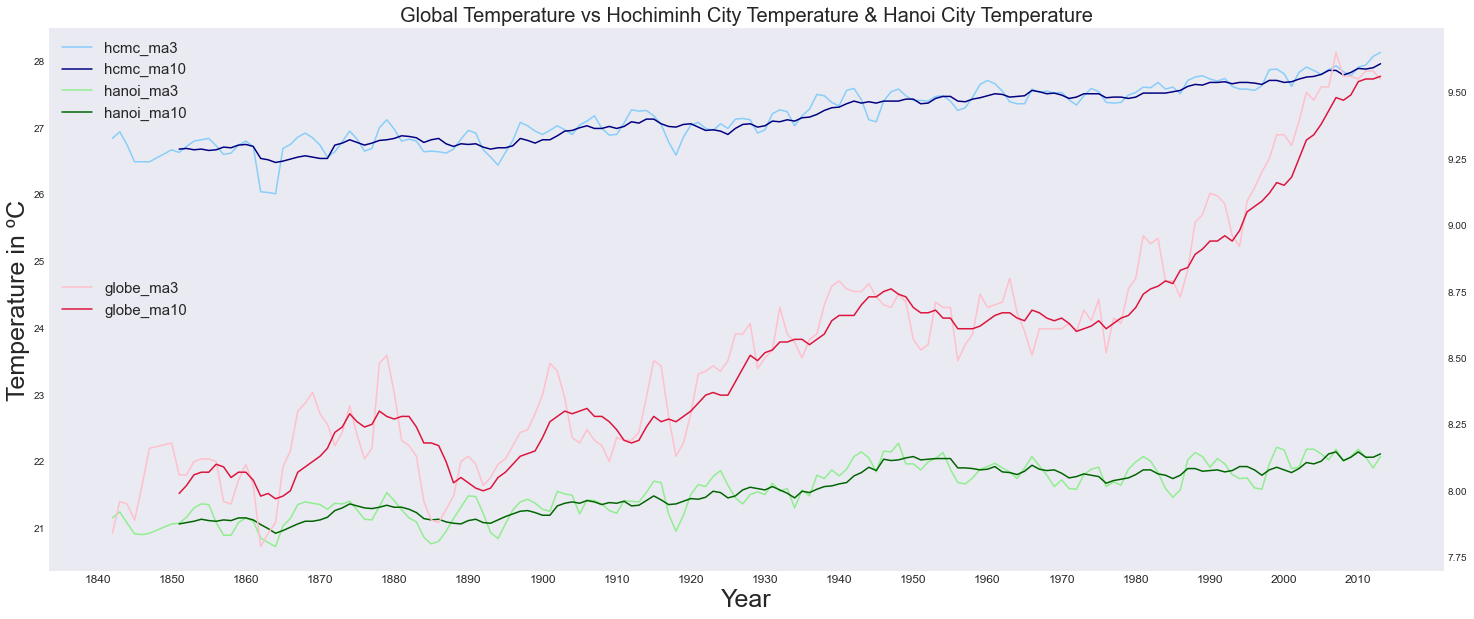

In [61]:
# Plotting line chart of moving average curves

plt.style.use("seaborn-deep")

fig, ax = plt.subplots(figsize=(25,10))

ax.plot(df['year'], df['hcmc_ma3'], label='hcmc_ma3', color="lightskyblue")
ax.plot(df['year'], df['hcmc_ma10'], label='hcmc_ma10', color="navy")
ax.plot(df['year'], df['hanoi_ma3'],label='hanoi_ma3', color="lightgreen")
ax.plot(df['year'], df['hanoi_ma10'], label='hanoi_ma10', color="darkgreen")
plt.xticks(np.arange(min(df['year']), max(df['year']), 10), fontsize=12)
ax.legend(loc='best', fontsize=15)

ax.set_xlabel('Year', size=25)
ax.set_ylabel('Temperature in ºC', size=25)

ax1= ax.twinx()
ax1.plot(df['year'], df['globe_ma3'],label='globe_ma3', color="pink")
ax1.plot(df['year'], df['globe_ma10'], label='globe_ma10', color="crimson")
ax1.legend(loc='center left', fontsize=15)

ax1.set_title("Global Temperature vs Hochiminh City Temperature & Hanoi City Temperature", size=20)
plt.show()


1. Moving average temperature of the globe is far below compared to the 2 biggest cities in Vietnam which are Ho Chi Minh City (HCMC) & Hanoi City. That is because Vietnam is located close to the equator and the climate is a typical tropical country. The globe average temperature is accountable for the whole world and most of them could be from temperate climate. 

2. On the global level, the temperature is on uptrend on the clear trend of the globe_ma10 curve. The globe_ma3 curve has frequently fluctuated between years before 1900. Since 1980s, there has been a steep increase in global average temperature. This would indicate that globe is getting hot quickly in the quick development of the world in every aspect especially as entering the 21th century.

3. The latitude of HCMC is closer to the equator than Hanoi city. Therefore, the data has clearly showed the average temperature of HCMC is hotter than Hanoi city. Besides, the average temperature of HCMC is increasing steadily and getting a bit steep in 2000s and onwards. On the other hand, the average temperature of Hanoi city is more stable over the years.  



## Correlation

In [59]:
correlation = df.corr()
correlation

,year,hcmc_temp,hanoi_temp,globe_temp,hcmc_ma3,hcmc_ma10,hanoi_ma3,hanoi_ma10,globe_ma3,globe_ma10
year,1.000000,0.811449,0.687176,0.863381,0.914574,0.974916,0.833946,0.919284,0.902860,0.925989
hcmc_temp,0.811449,1.000000,0.823387,0.842314,0.876978,0.834543,0.768790,0.793332,0.801371,0.798430
hanoi_temp,0.687176,0.823387,1.000000,0.730426,0.753408,0.692364,0.799773,0.729841,0.691364,0.660434
globe_temp,0.863381,0.842314,0.730426,1.000000,0.862366,0.857244,0.796098,0.806074,0.948011,0.921634
hcmc_ma3,0.914574,0.876978,0.753408,0.862366,1.000000,0.942725,0.904953,0.903104,0.907816,0.898897
hcmc_ma10,0.974916,0.834543,0.692364,0.857244,0.942725,1.000000,0.848235,0.951762,0.900137,0.940992
hanoi_ma3,0.833946,0.768790,0.799773,0.796098,0.904953,0.848235,1.000000,0.899875,0.844827,0.808633
hanoi_ma10,0.919284,0.793332,0.729841,0.806074,0.903104,0.951762,0.899875,1.000000,0.851729,0.896262
globe_ma3,0.902860,0.801371,0.691364,0.948011,0.907816,0.900137,0.844827,0.851729,1.000000,0.969924
globe_ma10,0.925989,0.798430,0.660434,0.921634,0.898897,0.940992,0.808633,0.896262,0.969924,1.000000


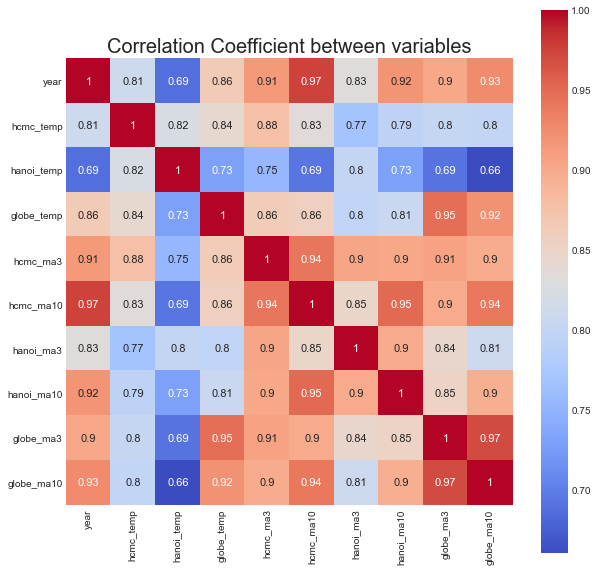

In [60]:
import seaborn as sns

fig, axs = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 11})
plt.title("Correlation Coefficient between variables", size=20)
plt.show()

The temperature of HCMC has a stronger correlation to globe temperature (0.84) than Hanoi city (0.73). 
That once again re-emphasis from the line chart's insight above where the steep increase of average temperature of the globe is also the time as HCMC temperature is getting increased slightly. Where the temperature of Hanoi is more stable compared to HCMC and the globe